In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from scipy import signal 

def lorenz_equation(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def simulate_lorenz_system():
    dt = 0.01
    num_steps = 10000
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    xs[0], ys[0], zs[0] = (0., 1., 1.05)
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz_equation(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs,ys,zs

def get_mutual_information(x,y):
    bins = np.linspace(-128.5,128,128*2+1)
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def time_delay_embed(x,ndelay=10,tau=1):
    nsample = len(x)
    final_length = nsample-ndelay*tau+1
    embeded_signal = []
    for i in range(ndelay):
        embeded_signal.append(x[i*tau:i*tau+final_length])
    return np.vstack(embeded_signal)

def find_time_delay_MI(x,ndelay = 50,tau = 1):
    embedding = time_delay_embed(x,ndelay=ndelay,tau=tau)
    mis = []
    for i in range(ndelay-1):
        mis.append(get_mutual_information(embedding[0],embedding[i+1]))
    return(mis)

## Time Delay Embedding
Many systems in the natural world are high dimensional yet often times we can only measure a few of the variables that directly play a role in the system of interest.  Such problem is common in the field of nonlinear dynamics, and one of the way to recover state of the full high dimensional system from recording of a few variables is the time delay embedding method.  Here we will show an application of the embedding tool on the lorenz attractor

## Introducing Lorentz
The lorentz system is a nonlinear system with three variables that exhibit chaotic behavior.  This means that solutions of the equations that are arbitrarily close to each other can end up in completely different places in the space of possible states of the system.  when the solutions of the system are plotted, the tractory appear to stay close to a three dimensional "attractor" with the shape of a butterfly.  This system is often used in nonlinear dynamics as an example of chaotic system, and is related to the term butterfly effect in describing the chaotic propperty of nonlinear models of whather systems

Text(0.5, 0.92, 'Lorenz Attractor')

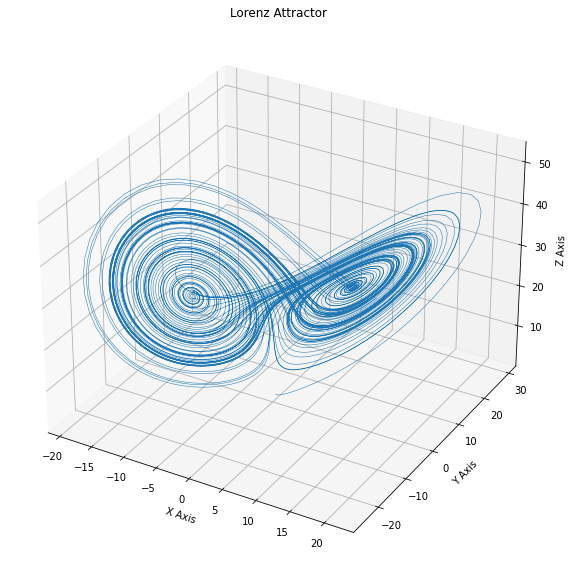

In [4]:
xs,ys,zs = simulate_lorenz_system()
ax = plt.figure(figsize = [10,10]).add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

## The case of limited measurements

Imagine youself as a researcher studying the Lorenz system.  However, due to limitation of the instruments and funding concerns, you can only measure one of the variables x

Here is the measurements you get

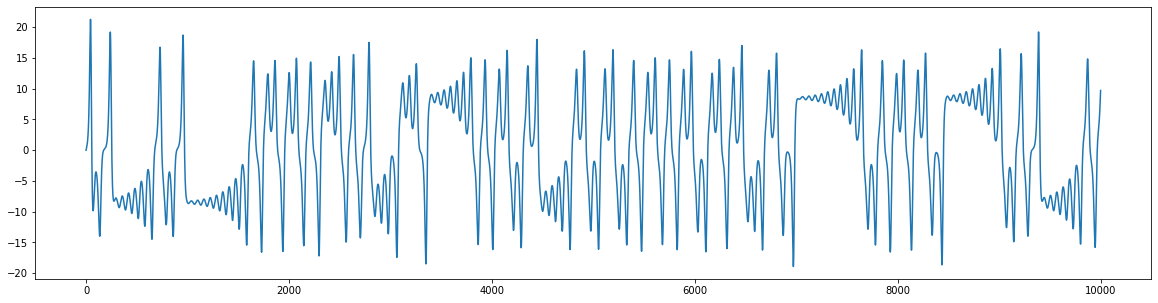

In [8]:
plt.figure(figsize = [20,5])
plt.plot(xs)

## Choosing the time delay

You are convinved that there are some interesting phenomenon involved in your measurement and that your system is likely multidimensional.  You remebered the method of Time Delay Embedding that your colleagues were talking about and decided to give it a try.

As time delay embedding involves increasing the signal dimension by taking delayed copy of the measurement, you wonder what is a good time delay to pick.  As an initial guess you settled on the idea that the time delay should be chosen so that each delayed copy share the minimal amount of information with each other, thereby maximizing the amount of independent information captured by each new copy.  You there fore calculated the amount of shared information between different time delayed copies using a measure called **mutual information**

Text(0.5, 1.0, 'first valley at 14 sample')

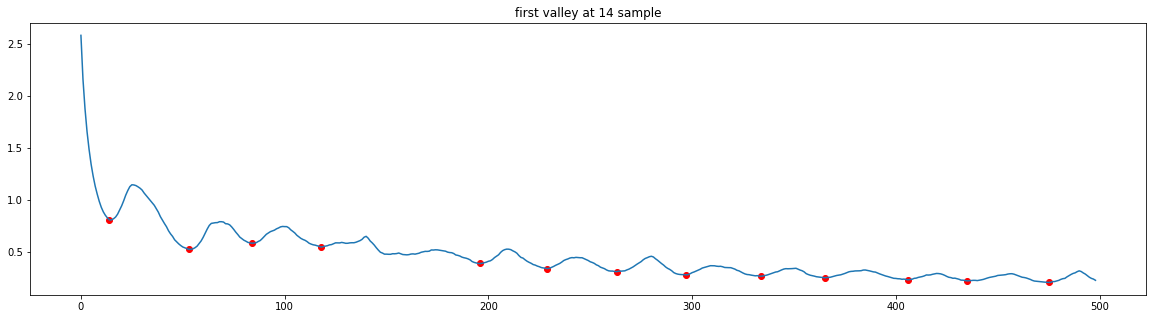

In [25]:
mis = np.array(mis)
plt.figure(figsize = [20,5])
plt.plot(mis)
peaks,_ = signal.find_peaks(-mis,prominence=0.05)
plt.scatter(peaks,mis[peaks],c='r')
plt.title(f'first valley at {peaks[0]} sample')

With the time delay of 14 you obtainted three copy of the signal spaced 14 samples apart.  Plotting the resulting "embedding" in 3d space, you found that indeed your system exhibit an interesting behavior where the trajectories seem to lie on the two circular regions and occasionally switch between the two

Text(0.5, 0.92, 'Lorenz Attractor Embedded in Time Delayed Coordinates')

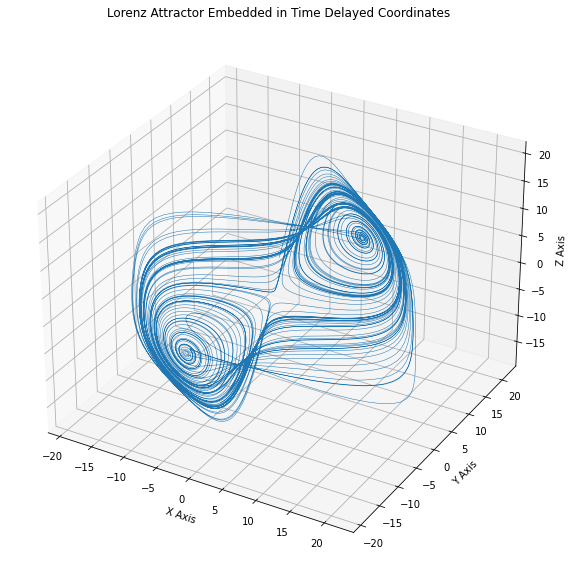

In [29]:
embedding = time_delay_embed(xs,ndelay=3,tau=14)
xs,ys,zs = embedding
ax = plt.figure(figsize = [10,10]).add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor Embedded in Time Delayed Coordinates")

## Comparing the original and Embedded system
Although the time delay embedding recovered the butterfly attractor, it did not exactly look like the original lorenz attractor.  They share similar qualities but one seems to be a transformed version of the other.

Text(0.5, 0.92, 'Original Lorenz Attractor')

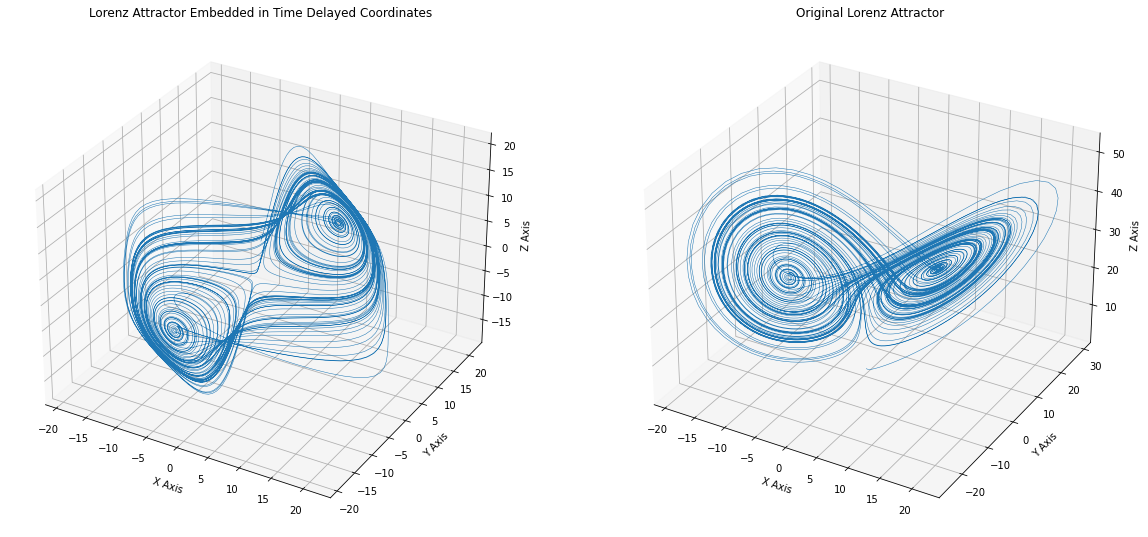

In [33]:
f = plt.figure(figsize = [20,10])

ax = f.add_subplot(1, 2, 1, projection='3d')
xs,ys,zs = embedding
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor Embedded in Time Delayed Coordinates")

ax = f.add_subplot(1, 2, 2, projection='3d')
xs,ys,zs = simulate_lorenz_system()
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Original Lorenz Attractor")

## Mathematical propperties between the reconstructed and the original signal

Over the time people have figured out some mathematical propperties of the time delayed embedding.  It turns out that the surfaces traced out by the original solutions are togologically the same as the surfaces traced out in the time delay embedding.  This means that near by trajectorys in the original space are still neighbors in the reconstructed space, and there are no abrupt jump or tear between the original and reconstructed trajectories, so that a smooth and continuous transformation can be used to describe how the original trajectories can be shaped to look like the embedding.  This is called **Takens Embedding theorem**

<img src="Capture.PNG" alt="drawing" width="1000"/>
